# <center>Trabajo Semanal 1</center>
### <center> Autor: Arturo Huber</center>

## Introducción teórica
En este trabajo semanal se abordará la síntesis de señales y su representación gráfica utilizando el lenguaje de programación Python. El objetivo principal es comprender cómo se construyen, representan y analizan señales discretas mediante conceptos fundamentales de teoría de señales y su visualización gráfica.

A continuación se presentan algunos conceptos teóricos clave que servirán como base para el desarrollo del trabajo.

*Amplitud*

La amplitud es el valor máximo que alcanza una señal respecto de su valor medio o de referencia. En señales senoidales, por ejemplo, representa el "pico" de la onda. La amplitud está directamente relacionada con la potencia que transporta la señal.

*Potencia y energia*

La energia de una señal se define como la integral del cuadrado de la señal, lo que seria el área bajo la curva, tomando todos sus valores como positivos.

Energía de una señal continua:

$$
E = \int_{-\infty}^{\infty} |x(t)|^2 \, dt
$$

Al trabajar con señales periodicas, o con señales que al infinito no convergen a cero, hablar de energia pierde sentido ya que la energia tenderia al infinita. Para estos casos, tiene mas sentido hablar de potencia, que seria energia por unidad de tiempo.

Potencia de una señal periódica continua con período $T$ se expresa como:

$$
P = \frac{1}{T} \int_{0}^{T} |x(t)|^2 \, dt
$$

Al estar trabajando con la representación digital de señales en Python, se trabaja con señales discretas, por lo que se cambian las integrales por sumas finitas.

Energía de una señal discreta:

$$
E = \sum_{n=0}^{N} |x[n]|^2
$$

Potencia de una señal discreta:

$$
P = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2
$$
*Modulacion*

La modulación es el proceso mediante el cual se modifica una señal portadora (de mayor frecuencia) para transmitir información de una señal moduladora (de menor frecuencia). En este trabajo se trabajará la modulación en amplitud (AM), que consiste en variar la amplitud de la portadora en función de la señal moduladora. Esto se logra multiplicando las funciones.

Señal modulada en amplitud:

$$
s[n] = \big[ 1 + k_a \cdot m[n] \big] \cdot c[n]
$$

Donde:<br>
$s[n]$ es la señal modulada<br>
$m[n]$ es la señal moduladora<br>
$c[n]$ es la señal portadora<br>
$k$ es el factor de variacion de la amplitud, en nuestro caso será 1

*Ortogonalidad* 

Se dice que dos funciones son ortogonales si su producto interno (o escalar) es cero. Este concepto es análogo a la ortogonalidad de dos vectores: cuando dos vectores son perpendiculares, su producto escalar es cero, lo que indica que no “comparten” información. De manera similar, en el espacio de funciones, si dos funciones son ortogonales, ninguna se puede expresar como combinación lineal de la otra y juntas pueden formar una base que “complete” un espacio de funciones. En otras palabras, cada función aporta información independiente de la otra.<br>
Dos funciones discretas $x[n]$ e $y[n]$ son ortogonales si:

$$
\sum_{n=0}^{N} x[n] \cdot y[n] = 0
$$

*Correlación*

La correlación entre dos señales nos indica que tan similares estas son.<br>
La correlación cruzada entre dos señales discretas $x[n]$ e $y[n]$ se define como:

$$
R_{xy}[k] = \sum_{n=-\infty}^{\infty} x[n] \cdot y[n-k]
$$
Donde $k$ es un desplazamiento temporal.<br>
Si los valores que toma la correlación son valores positivos altos, significa que estas señales tienden a aumentar y disminuir juntas. Si los valores que toma la correlacion son cercanos a cero, estas dos señales no presentan similitudes en su comportamients. Mientras que, si los valores que toma son altos y negativos significa que estas señales muestran un comportamientos inversamente proporcional.

Un caso especial es la autocorrelación de una función, es decir una función se compara consigo en un desplazamiento temportal, lo que sirve para identificar patrones temporales en la misma función.
$$
R_{xx}[k] = \sum_{n=-\infty}^{\infty} x[n] \cdot x[n-k]
$$

Para poder visualizar la correlación, se grafica la función calculada en relacion al desplazamiento $k$.
### Conceptos teóricos sobre la representación gráfica de señales
En el análisis y procesamiento digital de señales, el muestreo es el procedimiento mediante el cual una señal continua en el tiempo se convierte en una señal discreta. Para describir este proceso aparecen dos parámetros fundamentales: el tiempo de muestreo y la frecuencia de muestreo.

El tiempo de muestreo ($T_s$) es el intervalo temporal que transcurre entre la toma de dos muestras consecutivas de la señal. Un valor de $T_s$ pequeño implica que la señal se registra con mayor resolución temporal, mientras que un valor grande significa que la señal se describe con menos puntos en el tiempo.

La frecuencia de muestreo ($f_s$) es el número de muestras que se obtienen por segundo y está directamente relacionada con el tiempo de muestreo, ya que:

$$
f_s = 1/T_s
$$

Es decir, cuanto menor sea el tiempo de muestreo, mayor será la frecuencia de muestreo y más detallada será la representación digital de la señal.

La elección de $f_s$ no puede hacerse de manera arbitraria. El teorema de Nyquist-Shannon establece que, para poder reconstruir una señal continua a partir de sus muestras sin pérdida de información, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal original ($f_{\text{max}}$). Es decir:

$$
f_s \geq 2 f_{\text{max}}
$$

En conclusión, el tiempo y la frecuencia de muestreo son parámetros esenciales para garantizar una representación digital adecuada de una señal continua, y su correcta elección depende directamente del teorema de Nyquist, que fija el límite mínimo necesario para evitar pérdidas de información.

## Análisis y Desarrollo
Se procede con la resolución del trabajo

**Punto 1: Sintetización de señales**

Dado que se trabaja con señales con frecuencias en el orden de los KiloHertz, los graficos utilizan una escala en el orden de los microsegundos para mayor claridad visual


Se grafica en el mismo grafico, para poder apreciar la diferencia en la fase y en la amplitud, la señal senoidal original de 2KHz (azul) y la señal amplifacada y desfazada (naranja).

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generar_seno(amplitud, frecuencia, fase, fs, duracion, nombre):
    """
    Devuele los vectores t, y
    """
    Ts = 1/fs                                           # Tiempo de muestreo
    N = int(fs*duracion)                                # Numero de muestras
    t = np.arange(N) * Ts                               # Vector tiempo
    y = amplitud * np.sin(2*np.pi*frecuencia*t + fase)  # Vector seno

    print (f"Datos de la señal {nombre}:")
    print(f"Tiempo entre muestras (Ts) = {Ts:.2e} s")
    print(f"Número de muestras (N) = {N}")
    print(f"Potencia = {np.mean(y**2):.3f}")
    print("\n")
    return t, y


Datos de la señal Original:
Tiempo entre muestras (Ts) = 2.00e-05 s
Número de muestras (N) = 500
Potencia = 0.500


Datos de la señal amplificada y desfazada:
Tiempo entre muestras (Ts) = 2.00e-05 s
Número de muestras (N) = 500
Potencia = 2.000




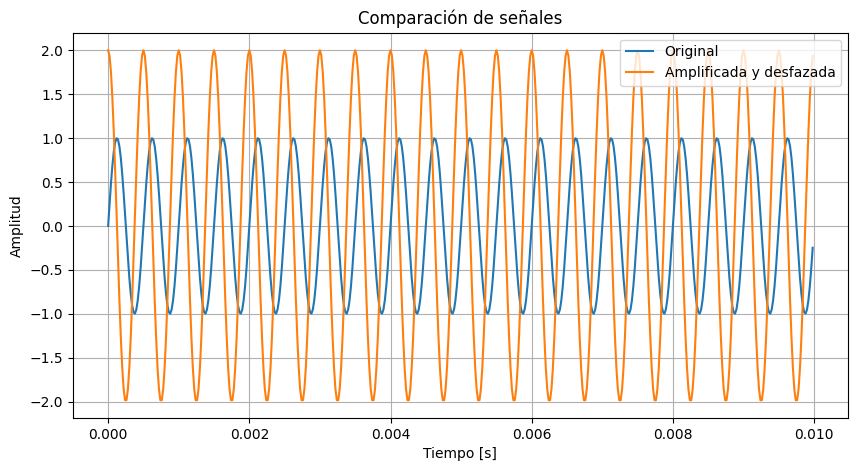

In [49]:
######################## Punto 1 y 2 ###################
# Señal original
AmplitudOriginal = 1
FrecuenciaOriginal = 2000

# Datos generales
fs = 50000
duracion = 0.01

t1, Original = generar_seno(amplitud = AmplitudOriginal, frecuencia = FrecuenciaOriginal,
                      fase=0, fs=fs, duracion=duracion, nombre = "Original")

# Señal amplificada y desfazada

t2, y2 = generar_seno(amplitud = AmplitudOriginal * 2, frecuencia = FrecuenciaOriginal, 
                      fase = np.pi/2, fs=fs, duracion=duracion, nombre = "amplificada y desfazada")

# Graficar ambas en la misma figura
plt.figure(figsize=(10,5))
plt.plot(t1, Original, label="Original")
plt.plot(t2, y2, label="Amplificada y desfazada")
plt.title("Comparación de señales")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

Para hacer la modulación, primero se crea la señal moduladora de la mitad de la frecuencia original. Se calculo la señal modulada segun lo visto en la parte teorica y se grafican las señales en el mismo grafico

Notar que el tiempo entre muestras y numero de muestras de la señal modulada coincide con los datos de la señal moduladora y portadora.

Datos de la señal señal moduladora:
Tiempo entre muestras (Ts) = 2.00e-05 s
Número de muestras (N) = 500
Potencia = 0.500


Potencia señal AM = 0.75
Amplitud: 1.74


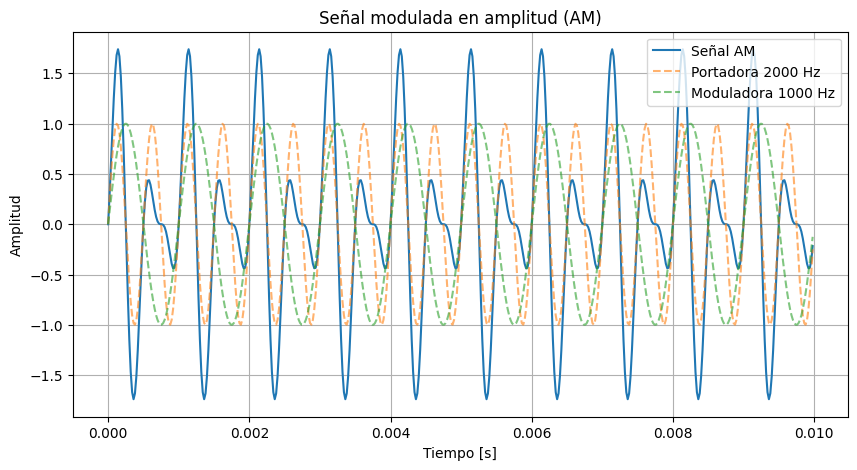

In [50]:
######################## Punto 3 ######################

# Señal moduladora
t, moduladora = generar_seno(amplitud = AmplitudOriginal, frecuencia = FrecuenciaOriginal/2, 
                             fase=0, fs=fs, duracion=duracion, nombre = "señal moduladora")

# Señal AM: (1 + moduladora) * portadora
s_am = (1 + moduladora) * Original

print(f"Potencia señal AM = {np.mean(s_am**2):.2f}")
print(f"Amplitud: {np.max(np.abs(s_am)):.2f}")

# Graficar
plt.figure(figsize=(10,5))
plt.plot(t, s_am, label="Señal AM")
plt.plot(t, Original, "--", alpha = 0.6,label=f"Portadora {FrecuenciaOriginal} Hz")
plt.plot(t, moduladora, "--",alpha = 0.6, label=f"Moduladora {FrecuenciaOriginal/2:.0f} Hz")
plt.title("Señal modulada en amplitud (AM)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


Para poder recortar la señal anterior al 75% de su amplitud maxima, primero se toma el valor máximo que toma la señal como su amplitud y despues se recortan los valores que mayores en modulo al 75%.

Al solamente cambiar algunos valores de la señal, el tiempo de muestreo y numero de muestras no se ven afectados.

Potencia señal recortada : 0.57
Amplitud: 1.30


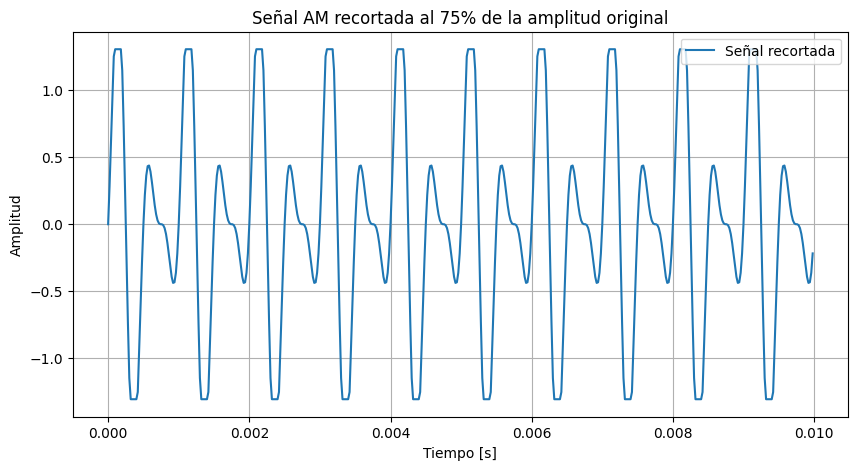

In [51]:
##################### Punto 4 ######################

Amp = np.max(np.abs(s_am))
s_clip = np.clip(s_am, - (Amp *0.75), Amp *0.75)

print(f"Potencia señal recortada : {np.mean(s_clip**2):.2f}")
print(f"Amplitud: {np.max(np.abs(s_clip)):.2f}")

# Graficar
plt.figure(figsize=(10,5))
plt.plot(t, s_clip, label = "Señal recortada")
plt.title("Señal AM recortada al 75% de la amplitud original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


Se grafica la señal cuadrada de frecuencia de 4KHz con la libreria scipy.

Datos de la señal cuadrada:
Tiempo entre muestras (Ts) = 2.00e-05 s
Número de muestras (N) = 500
Potencia = 1.000




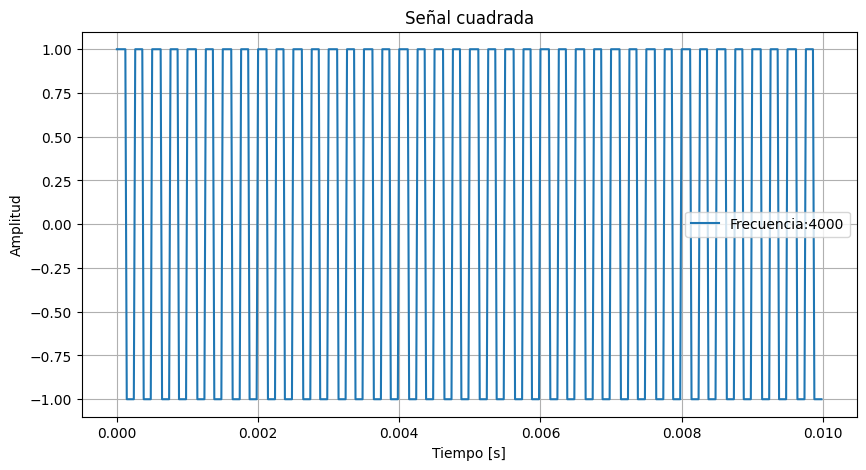

In [52]:
################### Punto 5 ######################

# Parametros

FrecuenciaCuadrada = 4000
fs = 50000
duracion = 0.01
AmplitudOriginal = 1

Ts = 1/fs                                           # Tiempo de muestreo
N = int(fs*duracion)                                # Numero de muestras
t = np.arange(N) * Ts   

# Señal cuadrada
sq = AmplitudOriginal * signal.square(2*np.pi*FrecuenciaCuadrada*t)   

print (f"Datos de la señal cuadrada:")
print(f"Tiempo entre muestras (Ts) = {Ts:.2e} s")
print(f"Número de muestras (N) = {N}")
print(f"Potencia = {np.mean(sq**2):.3f}")
print("\n")

# Graficar
plt.figure(figsize=(10,5))
plt.plot(t, sq, label = f"Frecuencia:{FrecuenciaCuadrada}")
plt.title("Señal cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


Se grafica un pulso rectangular de 10mS

Frecuencia de muestreo: 10000.0 Hz
Tiempo entre muestras: 0.0001 s
Numero de muestras: 500
Energía: 100.0


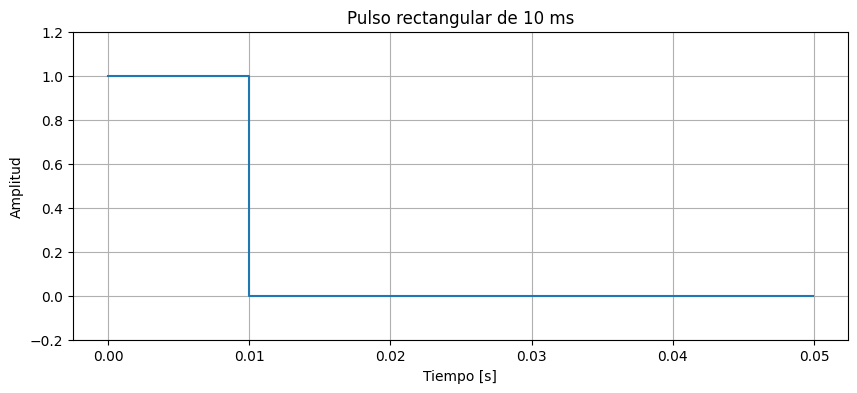

In [53]:
################### Punto 6 #######################

# Parámetros
duracion = 0.05    
pulso_duracion = 0.01  # 10 ms
N = 500
t = np.linspace(0, duracion, N, endpoint=False)

# Pulso rectangular
pulso = np.where(t < pulso_duracion, 1.0, 0.0)

# Muestreo
fs = N / duracion
Ts = 1 / fs

# Energía 
E = np.sum(pulso**2)

print("Frecuencia de muestreo:", fs, "Hz")
print("Tiempo entre muestras:", Ts, "s")
print ("Numero de muestras:", N)
print("Energía:", E)

# Graficar
plt.figure(figsize=(10,4))
plt.plot(t, pulso, drawstyle="steps-post")
plt.title("Pulso rectangular de 10 ms")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.show()

<br><br>
**Punto 2: Verificar ortogonalidad entre señales**

Para chequear la ortogonalidad entre las funciones sintetizadas anteriormente, se crea la siguiente función. Si el prodcuto interno da cero, quiere decir que las funciones son ortogonales

In [54]:
def ortogonalidad(f, g, nombre1, nombre2):
    
    tol = 1*np.exp(-5)
    """
    Verifica la ortogonalidad de dos funciones discretas usando producto interno.

    Parámetros:
        f, g : Funciones discretas
            Valores de las funciones evaluadas en los mismos puntos.
        tol : float
            Tolerancia para considerar el producto interno como cero.
    
    """
    # Producto interno discretizado
    producto_interno = np.sum(f * g)
    #print (f"{producto_interno}")
    
    if producto_interno < tol:
        print(f"Las funciones {nombre1} y {nombre2} son ortogonales")
    else:
        print(f"Las funciones {nombre1} y {nombre2} no son ortogonales")
    

In [55]:
ortogonalidad(Original, y2, "Original", "Desfazada y amplificada")
ortogonalidad(Original, s_am, "Original", "Modulada")
ortogonalidad(Original, s_clip, "Original", "Modulada Recortada")
ortogonalidad(Original, sq, "Original", "Cuadrada")
ortogonalidad(Original, pulso, "Original", "Pulso")

Las funciones Original y Desfazada y amplificada son ortogonales
Las funciones Original y Modulada no son ortogonales
Las funciones Original y Modulada Recortada no son ortogonales
Las funciones Original y Cuadrada no son ortogonales
Las funciones Original y Pulso son ortogonales


<br><br>**Punto 3: Grafico de las correlaciones entre las señales anteriormente sintetizadas**

Para graficar la autocorrelación de la primer señal y las correlaciones cruzadas con las otras funciones creadas, se arman la siguientes funciones.

In [92]:
def graficar_autocorrelacion(f, fs):
    """
    Grafica una señal discreta y su autocorrelación.
    
    Parámetros:
        f    : Funciones discretas
        fs   : frecuencia de muestreo (Hz) para mostrar tiempo y lag correctos
    """
    
    
    N = len(f)
    t = np.arange(N) / fs

    # Correlación cruzada lineal
    corr = np.correlate(f, f, mode="full") / N
    lags = np.arange(-N+1, N) / fs  # desfase en segundos
    
    # Gráficos
    fig, axs = plt.subplots(2, 1, figsize=(10, 5))

    # Señales originales
    axs[0].plot(t, f)
    axs[0].set_title("Señal original")
    axs[0].grid(True)

    # Correlación cruzada
    axs[1].plot(lags, corr)
    axs[1].set_title("Grafico de la autocorrelación")
    axs[1].set_xlabel("Desplazamiento [s]")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [93]:
def graficar_correlacion(f, g, fs):
    """
    Grafica dos señales discretas y su correlación cruzada lineal.
    
    Parámetros:
        f, g : Funciones discretas
        fs   : frecuencia de muestreo (Hz) para mostrar tiempo y lag correctos
    """
    
    
    N = len(f)
    t = np.arange(N) / fs

    # Correlación cruzada lineal
    corr = np.correlate(f, g, mode="full")
    lags = np.arange(-N+1, N) / fs  # desfase en segundos

    # Gráficos
    fig, axs = plt.subplots(2, 1, figsize=(10, 5))

    # Señales originales
    axs[0].plot(t, f)
    axs[0].plot(t, g)
    axs[0].set_title("Señales originales")
    #axs[0].legend()
    axs[0].grid(True)

    # Correlación cruzada
    axs[1].plot(lags, corr)
    axs[1].set_title("Grafico de la correlación cruzada")
    axs[1].set_xlabel("Desplazamiento [s]")
    axs[1].grid(True)
    print("\n\n\n")
    plt.tight_layout()
    plt.show()

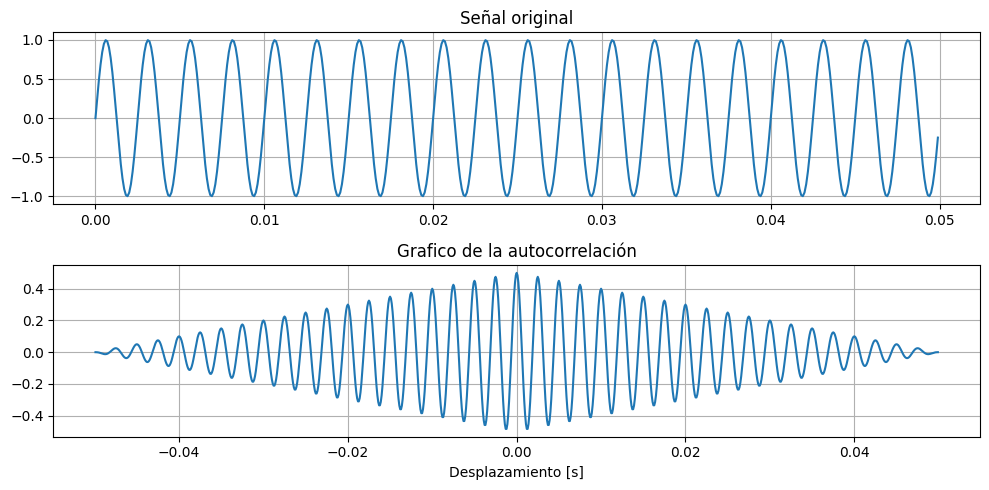

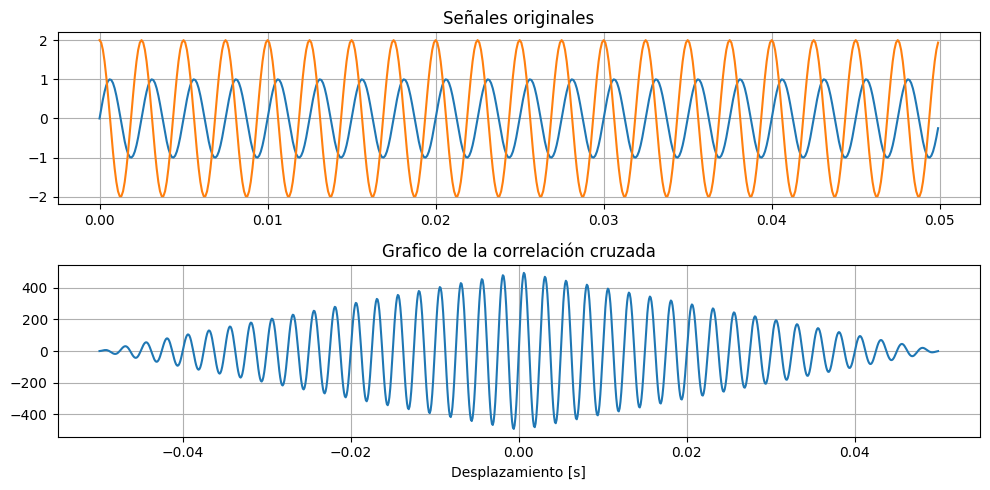

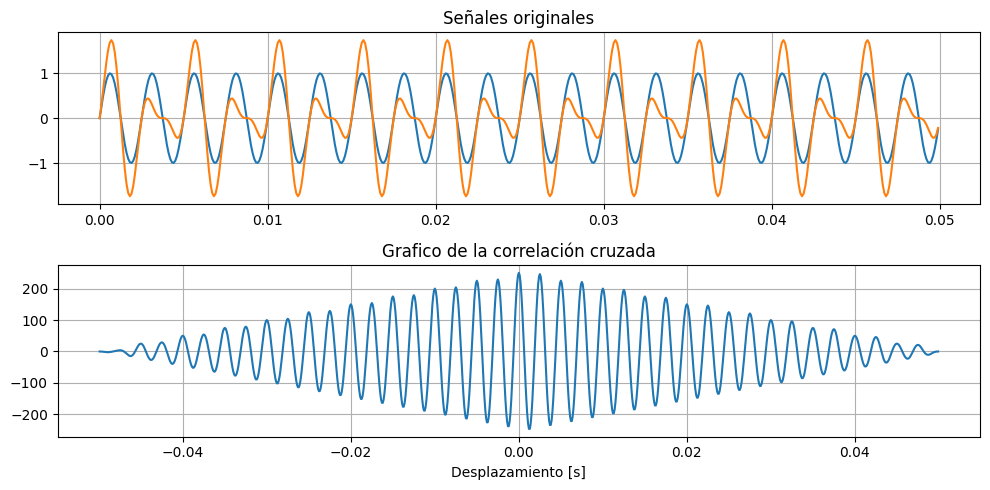

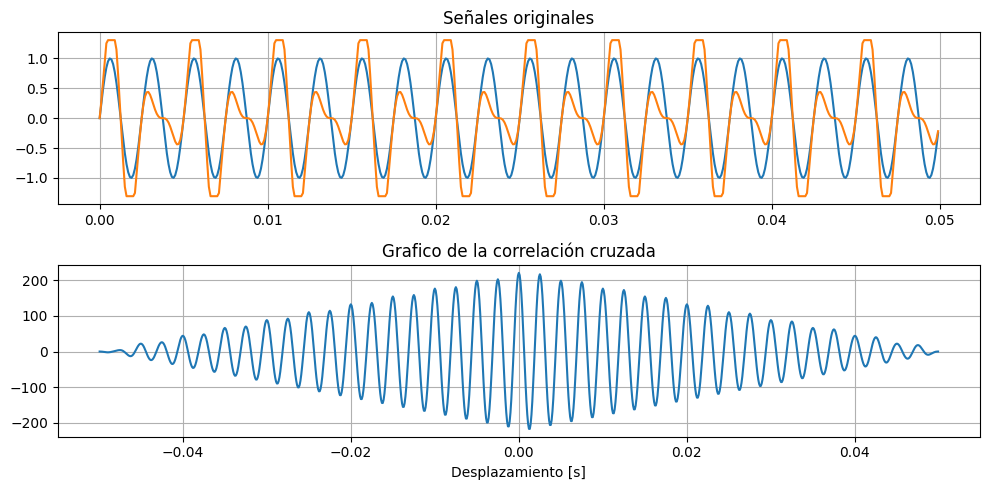

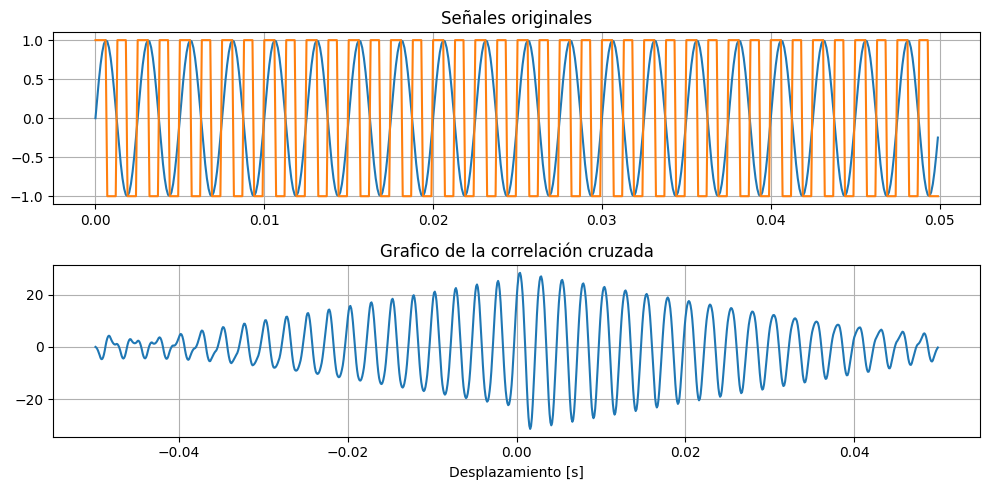

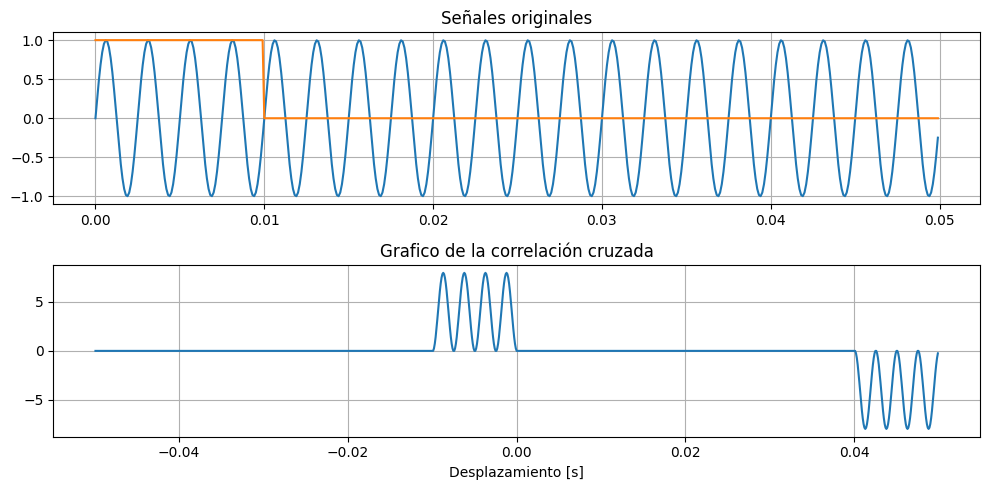

In [94]:
graficar_autocorrelacion(Original, fs)
graficar_correlacion(Original, y2, fs)
graficar_correlacion(Original, s_am, fs)
graficar_correlacion(Original, s_clip, fs)
graficar_correlacion(Original, sq, fs)
graficar_correlacion(Original, pulso, fs)

En el caso de señales periódicas de duración finita, la correlación cruzada entre estas señales también muestra un comportamiento periódico, pero con una funcion envolvente triangular. Inicialmente, la amplitud de la correlación crece con el desplazamiento hasta alcanzar un valor máximo, correspondiente a la máxima superposición de las señales. A partir de allí, la amplitud comienza a decrecer conforme disminuye la región de solapamiento. Este comportamiento genera la función envolvente de forma triangular, la cual responde al resultado de la convolución de las ventanas temporales rectangulares que limitan la duración finita de las señales.

En el caso de la autocorrelación se nota claramente este efecto, podemos comparar el resultado experimental que obtuvimos con el resultado teórico para comprobar lo dicho, para ello, primero calculamos el resultado teórico de la autocorrelación de una función seno.

Sea la señal continua

$$
x(t) = A \sin(\omega_0 t),
$$

con amplitud $A$ y frecuencia angular $\omega_0$.

La autocorrelación de señales continuas se define como:

$$
R_x(\tau) = \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^{T} x(t)\, x(t+\tau) \, dt,
$$

donde $\tau$ es el desplazamiento temporal.

El producto de senos es

$$
\begin{aligned}
x(t)x(t+\tau) &= A \sin(\omega_0 t)\; A \sin(\omega_0 (t+\tau)) \\[1mm]
&= A^2 \sin(\omega_0 t) \sin(\omega_0 t + \omega_0 \tau).
\end{aligned}
$$

Usando la identidad trigonométrica

$$
\sin \alpha \sin \beta = \frac{1}{2} \big[ \cos(\alpha-\beta) - \cos(\alpha+\beta) \big],
$$

con $\alpha = \omega_0 t$ y $\beta = \omega_0 t + \omega_0 \tau$:

$$
x(t)x(t+\tau) = \frac{A^2}{2} \Big[ \cos(\omega_0 \tau) - \cos(2 \omega_0 t + \omega_0 \tau) \Big].
$$

Sustituyendo en la integral:

$$
\begin{aligned}
R_x(\tau) &= \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^{T} \frac{A^2}{2} \Big[ \cos(\omega_0 \tau) - \cos(2 \omega_0 t + \omega_0 \tau) \Big] dt \\[1mm]
&= \frac{A^2}{4} \lim_{T \to \infty} \frac{1}{T} \Big[ \int_{-T}^{T} 2 \cos(\omega_0 \tau) dt - \int_{-T}^{T} 2 \cos(2 \omega_0 t + \omega_0 \tau) dt \Big].
\end{aligned}
$$

La primera integral es $\int_{-T}^{T} \cos(\omega_0 \tau) dt = 2T \cos(\omega_0 \tau)$, y la segunda es un coseno de frecuencia $2 \omega_0$ en $t$, que al promediarse tiende a cero cuando $T \to \infty$.

Por tanto, la autocorrelación de un seno es:

$$
R_x(\tau) = \frac{A^2}{2} \cos(\omega_0 \tau).
$$



Graficamos el resultado obtenido y la autoccorelación experimental

In [81]:
def comparar_autocorrelacion(f, fs, amp, f0):
    """
    Grafica la autocorrelacion teorica y experimental
    
    Parámetros:
        f    : Funciones discretas
        fs   : frecuencia de muestreo (Hz) para mostrar tiempo y lag correctos
    """
    
    
    N = len(f)
    t = np.arange(N) / fs

    # Correlación lineal
    corr = np.correlate(f, f, mode="full") / N
    lags = np.arange(-N+1, N) / fs  # desfase en segundos

    y = ((amp**2)/2) * np.cos(2*np.pi*f0 * lags )

    # Gráficos
    plt.figure(figsize=(10,5))
    plt.plot( lags, corr, label="experimental")
    plt.plot( lags, y, label="teorico")
    plt.title("Comparación de autocorrelaciones")
    plt.xlim(
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.show()


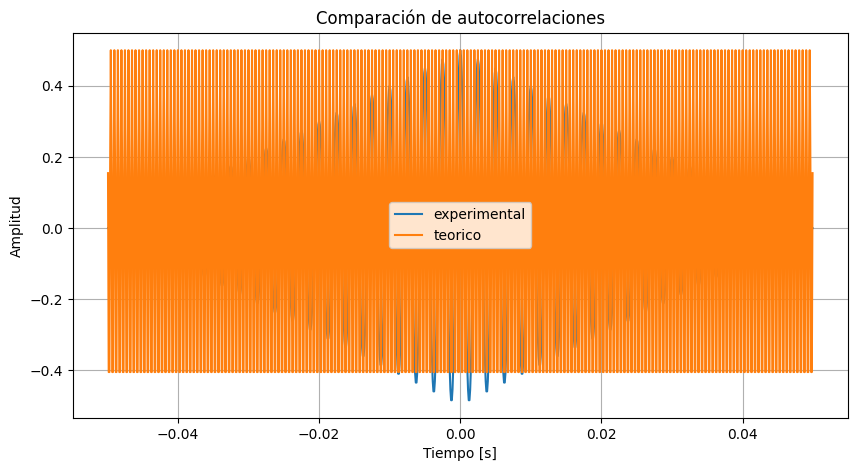

In [82]:
comparar_autocorrelacion(Original, fs, AmplitudOriginal, FrecuenciaOriginal)

Sea la señal continua

$$
x(t) = A \sin(\omega_0 t),
$$

con amplitud $A$ y frecuencia angular $\omega_0$.

La autocorrelación de señales continuas e infinitas se define como

$$
R_x(\tau) = \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^{T} x(t)\, x(t+\tau) \, dt,
$$

donde $\tau$ es el desplazamiento temporal.

El producto de senos es

$$
\begin{aligned}
x(t)x(t+\tau) &= A \sin(\omega_0 t)\; A \sin(\omega_0 (t+\tau)) \\[1mm]
&= A^2 \sin(\omega_0 t) \sin(\omega_0 t + \omega_0 \tau).
\end{aligned}
$$

Usando la identidad trigonométrica

$$
\sin \alpha \sin \beta = \frac{1}{2} \big[ \cos(\alpha-\beta) - \cos(\alpha+\beta) \big],
$$

con $\alpha = \omega_0 t$ y $\beta = \omega_0 t + \omega_0 \tau$:

$$
x(t)x(t+\tau) = \frac{A^2}{2} \Big[ \cos(\omega_0 \tau) - \cos(2 \omega_0 t + \omega_0 \tau) \Big].
$$

Sustituyendo en la integral:

$$
\begin{aligned}
R_x(\tau) &= \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^{T} \frac{A^2}{2} \Big[ \cos(\omega_0 \tau) - \cos(2 \omega_0 t + \omega_0 \tau) \Big] dt \\[1mm]
&= \frac{A^2}{4} \lim_{T \to \infty} \frac{1}{T} \Big[ \int_{-T}^{T} 2 \cos(\omega_0 \tau) dt - \int_{-T}^{T} 2 \cos(2 \omega_0 t + \omega_0 \tau) dt \Big].
\end{aligned}
$$

La primera integral es $\int_{-T}^{T} \cos(\omega_0 \tau) dt = 2T \cos(\omega_0 \tau)$, y la segunda es un coseno de frecuencia $2 \omega_0$ en $t$, que al promediarse tiende a cero cuando $T \to \infty$.

Por tanto, la autocorrelación de un seno puro continuo e infinito es

$$
R_x(\tau) = \frac{A^2}{2} \cos(\omega_0 \tau).
$$

Su amplitud es igual a la potencia media de la señal: $A^2/2$, y si se normaliza por $R_x(0)$ se obtiene

$$
\rho_x(\tau) = \cos(\omega_0 \tau).
$$



<br><br>**Punto 4: Demostrar que $\boldsymbol{\,2\sin\alpha\sin\beta=\cos(\alpha-\beta)-\cos(\alpha+\beta)}$**

<br>Recordando la identidad de Euler $e^{j\theta}=\cos\theta + j\sin\theta$, entonces $\cos\theta= (e^{j\theta}+e^{-j\theta})/ 2$:


$$
\begin{aligned}
\cos(\alpha-\beta)-\cos(\alpha+\beta)
&= \frac{e^{j(\alpha-\beta)}+e^{-j(\alpha-\beta)}}{2}
- \frac{e^{j(\alpha+\beta)}+e^{-j(\alpha+\beta)}}{2} \\[6pt]
&= \tfrac{1}{2}\Big(e^{j\alpha}e^{-j\beta}+e^{-j\alpha}e^{j\beta}
- e^{j\alpha}e^{j\beta}-e^{-j\alpha}e^{-j\beta}\Big) \\[6pt]
&= \tfrac{1}{2}\Big(e^{j\alpha}(e^{-j\beta}-e^{j\beta})
+ e^{-j\alpha}(e^{j\beta}-e^{-j\beta})\Big).
\end{aligned}
$$


<br>Por la identidad de Euler, se puede despejar el seno $(e^{-j\beta}-e^{j\beta})/(-2j)=\sin\beta$, operando algebraicamente, $e^{j\beta}-e^{-j\beta}=2j\sin\beta$, reemplazamos:

$$
\begin{aligned}
\cos(\alpha-\beta)-\cos(\alpha+\beta)
&= \tfrac{1}{2}\Big(e^{j\alpha}(-2j\sin\beta) + e^{-j\alpha}(2j\sin\beta)\Big) \\[6pt]
&= \sin\beta \cdot \tfrac{1}{2}\big(-2j e^{j\alpha} + 2j e^{-j\alpha}\big) \\[6pt]
&= \sin\beta \cdot j\big(e^{-j\alpha}-e^{j\alpha}\big).
\end{aligned}
$$
<br>
Finalmente, usando que $ e^{-j\alpha}-e^{j\alpha}=-2j\sin\alpha$:

$$
\cos(\alpha-\beta)-\cos(\alpha+\beta)
= \sin\beta \cdot j \cdot (-2j\sin\alpha)
= \sin\beta \cdot (-2j^2 \sin\alpha)
= \sin\beta \cdot (-2(-1)\sin\alpha)
= 2\sin\alpha\sin\beta.
$$
<br>
Por lo tanto, queda demostrada la identidad:

$$
\boxed{\,2\sin\alpha\sin\beta=\cos(\alpha-\beta)-\cos(\alpha+\beta)\,}
$$



Mostramos numericamente que la igualdad anterior se cumple con $\beta = 2\alpha$, con el siguiente ejemplo.

Error máximo entre ambas funciones: 7.216449660063518e-15


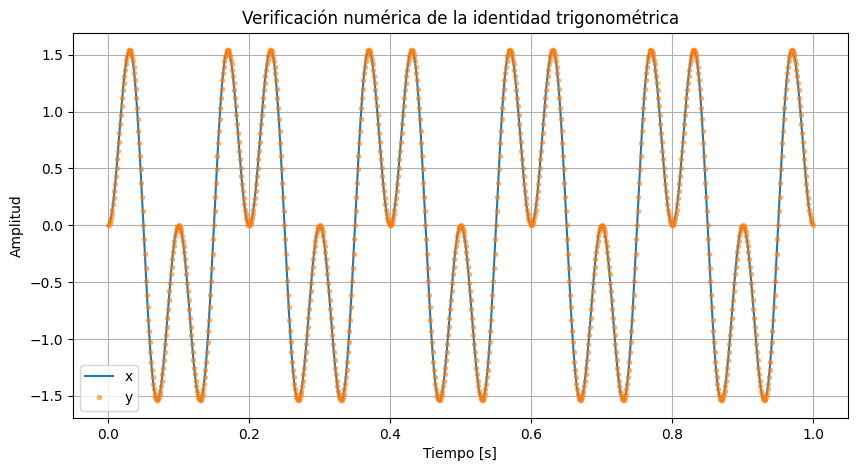

In [61]:

# Parámetros
n = 1000       
f = 5           
t = np.linspace(0, 1, n, endpoint=False)  

# Definimos alfa y beta
alpha = 2 * np.pi * f * t
beta  = 2 * 2 * np.pi * f * t   # doble frecuencia

# Lado izquierdo: 2*sin(alpha)*sin(beta)
x = 2 * np.sin(alpha) * np.sin(beta)

# Lado derecho: cos(alpha - beta) - cos(alpha + beta)
y = np.cos(alpha - beta) - np.cos(alpha + beta)

# Verificación numérica (error máximo)
error_max = np.max(np.abs(x - y))
print("Error máximo entre ambas funciones:", error_max)

# Graficamos
plt.figure(figsize=(10,5))
plt.plot(t, x, label = "x")
plt.plot(t, y, '.',alpha=0.5, label = "y")
plt.title("Verificación numérica de la identidad trigonométrica")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones

En este trabajo se pudo afianzar conocimientos sobre el grafico y sintetización de señales mediante Python. Para cada señal se determinó el tiempo entre muestras, el número total de muestras y se calculó su potencia o energía, proporcionando una caracterización digital completa de la señal.

También se pudo operar exitosamente con las funciones, puediendo calcular su ortogonalidad y graficar las correlaciones entre las distintas señales sintetizadas.

También se comprobó algebraica y numericamente una identidad trigonometrica muy importante para el análisis de señales ya que esta propiedad es clave para la demodulacion de señales.

En sintesis, el trabajo permitió relacionar conceptos teóricos de procesamiento de señales con su implementación práctica: generación de señales, análisis de potencia y energía, verificación de ortogonalidad y el uso de la correlación.

## Autoevalucion de Aprendizaje

Creo que resolví la tarea con seguridad, me quedo más claro el uso de python para el grafico y sintesis de señales, y como operar con ellas.

Usé ChatGPT para ayudarme con la escitura de los codigos y con la conformación del informe.